<h2 style="color:blue">Multiple Linear Regression</h2>
* Linear regression is a simple approach to <b>supervised learning</b>. It assumes
that the dependence of $Y$ on $X_1$, $X_2$, . . . , $X_p$ is linear.
* In general, suppose that we have $p$ distinct predictors. Then the multiple linear regression model takes the form :

$$
\begin{aligned}
 Y = \beta_0 + \beta_1X_1 + \beta_2 X_2 + ... + \beta_pX_p + \epsilon
\end{aligned}
$$
* The regression coefficients $\beta_0$, $\beta_1$, ... , $\beta_p$ are unknown, and must be estimated.
* The parameters are estimated using the same <b>least square</b> approach of simple linear regression. We choose $\beta_0$, $\beta_1$, ... , $\beta_p$ to minimize the <b>sum of squared residuals RSS</b>:

$$
\begin{aligned}
RSS & =  \sum_{i=1}^n(y_i - \hat{y_i})^2\\
 & = \sum_{i=1}^n(y_i - \hat{\beta_0} - \hat{\beta_1}x_{i1} - \hat{\beta_2}x_{i2} - ... - \hat{\beta_p}x_{ip})^2
\end{aligned}
$$

The values $\hat{\beta_0}$, $\hat{\beta_1}$,..., $\hat{\beta_p}$ that minimize <b>RSS</b> are the multiple <b>least squares regression coefficient estimates</b>.

In [30]:
import warnings
warnings.filterwarnings("ignore")

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
print(dataset.columns)
print(dataset.info())

X = dataset.drop('Profit', axis=1)
y = dataset['Profit']
# R&D Spend (Research & Development Spend)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB
None


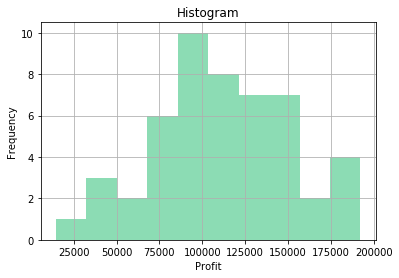

In [32]:
#Histogram
plt.hist(y,color='#8cdcb4')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram')
#Using Grids
plt.grid()
plt.show()

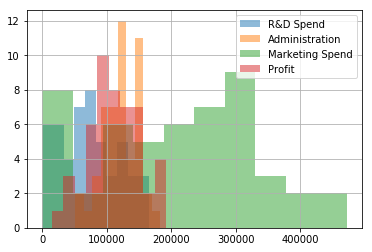

In [33]:
plt.hist(X['R&D Spend'],alpha=0.5, label='R&D Spend')
plt.hist(X['Administration'],alpha=0.5, label='Administration')
plt.hist(X['Marketing Spend'],alpha=0.5, label='Marketing Spend')
plt.hist(y, alpha=0.5, label='Profit')
plt.legend(loc='upper right')
plt.grid()
plt.show()

New York      17
California    17
Florida       16
Name: State, dtype: int64


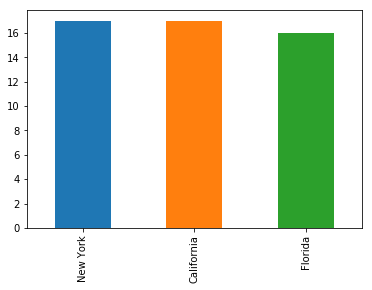

In [34]:
X['State'].value_counts().plot(kind='bar')
print(X['State'].value_counts())

In [35]:
# Creating dummy varialbe
X_new = pd.get_dummies(X,columns=['State'])
# Avoiding the Dummy Variable Trap
X_new = X_new.drop('State_New York', axis=1)

In [37]:
print(type(X_new))
print(X_new.columns)
print(X_new.shape)

<class 'pandas.core.frame.DataFrame'>
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State_California',
       'State_Florida'],
      dtype='object')
(50, 5)


In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, 
                    y, test_size = 0.3, random_state = 0)

In [16]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % 
      regressor.score(X_test, y_test))

Linear Regression R squared": 0.9359


In [381]:
# Calculate root-mean-square error (RMSE)
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 7867.8551


# <i>P</i>-value

When you perform a hypothesis test in statistics, a <i>p</i>-value helps you determine the significance of your results. Hypothesis tests are used to test the validity of a claim that is made about a population. This claim that’s on trial, in essence, is called the null hypothesis.All hypothesis tests ultimately use a <i>p</i>-value to weigh the strength of the evidence (what the data are telling you about the population). The <i>p</i>-value is a number between 0 and 1 and interpreted in the following way:

* A small <i>p</i>-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
* A large <i>p</i>-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
* <i>p</i>-values very close to the cutoff (0.05) are considered to be marginal (could go either way). Always report the <i>p</i>-value so your readers can draw their own conclusions.



# Null Hypothesis

$H_0$ a: In the presence of the others, there is no relationship between profit and constants 

$H_0$ b: In the presence of the others, there is no relationship between profit and R&D Spend

$H_0$ c: In the presence of the others, there is no relationship between profit and Administration

$H_0$ d: In the presence of the others, there is no relationship between profit and Marketing Spend

$H_0$ e: In the presence of the others, there is no relationship between profit and State_California

$H_0$ f: In the presence of the others, there is no relationship between profit and State_Florida

### Statsmodels’s Documentation
https://www.statsmodels.org/stable/index.html

In [41]:
#Bulding the optimal model using Backward Elimination
import statsmodels.formula.api as sm

X = np.append(arr = np.ones((50,1)), values = X_new, 
              axis = 1)
print(X.shape)
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

(50, 6)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           1.34e-27
Time:                        16:36:56   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4            41.8870   3256.039      0.013      0.990   -6520.229    6604.003
x5           240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
X_opt = X[:, [0,1,2,3,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           8.49e-29
Time:                        16:38:18   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1             0.8060      0.046     17.606      0.000       0.714       0.898
x2            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x3             0.0270      0.017      1.592      0.118      -0.007       0.061
x4           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
X_opt = X[:, [0,1,2,3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           4.53e-30
Time:                        16:10:33   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
X_opt = X[:, [0, 1,3]] # Adj. R-squared = 0.945
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           2.16e-31
Time:                        16:10:43   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
###Automatic implementations of Backward Elimination
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

In [48]:
#Bulding the optimal model using Backward Elimination
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((50,1)), values = X_new, 
              axis = 1)
SL = 0.05
X_Modeled = backwardElimination(X, SL)
print(X_Modeled.shape)

(50, 2)


In [44]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Modeled, 
                                                    y, test_size = 0.3, random_state = 0)

In [27]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.9360


In [45]:
# Calculate root-mean-square error (RMSE)
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 7857.3145
